<a href="https://colab.research.google.com/github/justinguo18/Predicting-Company-Success-with-Machine-Learning/blob/main/MA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arrow
!pip install geopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.9 MB/s eta 0:00:00


# New Section

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

import arrow
import datetime as dt
from sklearn.utils import resample
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
files.upload()

In [ ]:
combined = pd.read_csv('combined.csv')
df = pd.read_csv('combined.csv')
df.info()
null = df.isnull().sum().sum()
print(null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               66368 non-null  int64  
 1   permalink                66368 non-null  object 
 2   name                     66367 non-null  object 
 3   homepage_url             61310 non-null  object 
 4   category_list            63220 non-null  object 
 5   funding_total_usd        66368 non-null  object 
 6   status                   66368 non-null  object 
 7   country_code             59410 non-null  object 
 8   state_code               57821 non-null  object 
 9   region                   58338 non-null  object 
 10  city                     58340 non-null  object 
 11  funding_rounds           66368 non-null  int64  
 12  founded_at               51147 non-null  object 
 13  first_funding_at         66344 non-null  object 
 14  last_funding_at       

In [ ]:
df.dropna(inplace = True)
null = df.isnull().sum().sum()
print(null)

0


In [ ]:
# one-hot encoding and other data cleaning

for category in ['funding_round_type', 'category_list', 'status']:
  unique = df[category].unique()
  print(unique)
  if len(unique) < 20:
    for name in unique:
      df[name] = 0
    for name in unique:
      df[name] = np.where(df[category] == name, 1, 0)

unique_country_code = df['country_code'].unique()
for number in unique_country_code:
  df[str(number)] = 0
  df[str(number)] = np.where(df['country_code'] == number, 1, 0)
string_unique_country_code = []
for i in unique_country_code:
  string_unique_country_code.append(str(i))

unique_city = df['city'].unique()
for number in unique_city:
  df[str(number)] = 0
  df[str(number)] = np.where(df['city'] == number, 1, 0)
string_unique_city = []
for i in unique_city:
  string_unique_city.append(str(i))

unique_funding_rounds = df['funding_rounds'].unique()
for number in unique_funding_rounds:
  df[str(number)] = 0
  df[str(number)] = np.where(df['funding_rounds'] == number, 1, 0)
string_unique_funding_rounds = []
for i in unique_funding_rounds:
  string_unique_funding_rounds.append(str(i))

for i in ['first_funding_at', 'last_funding_at', 'founded_at']:
  df[i] = df[i].str.replace('-', '')

df['funding_total_usd_cleaned'] = df['funding_total_usd'].apply(lambda x: 0 if x == '-' else x)

['venture' 'seed' 'debt_financing' 'grant' 'angel' 'private_equity'
 'convertible_note' 'post_ipo_equity' 'undisclosed' 'post_ipo_debt'
 'equity_crowdfunding' 'secondary_market' 'non_equity_assistance'
 'product_crowdfunding']
['Curated Web' 'Software' 'Biotechnology' ...
 'Analytics|Android|Developer APIs|Education|Gamification|iOS'
 'Advertising|Mobile|Web Development|Wireless'
 'Consumer Electronics|Internet of Things|Telecommunications']
['operating' 'acquired' 'closed' 'ipo']


Streaming output truncated to the last 5000 lines.
<ipython-input-9-61d7869f6609>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[str(number)] = 0
<ipython-input-9-61d7869f6609>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[str(number)] = 0
<ipython-input-9-61d7869f6609>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

In [ ]:
# all feature transformations

df['funding_difference'] = df['last_funding_at'].astype('int32') - df['first_funding_at'].astype('int32')

df['has_funding'] = df['funding_total_usd_cleaned'].apply(lambda x: 0 if x == 0 else 1)

df = df[df['funding_total_usd_cleaned'] != 0]
df = df[df['raised_amount'] != 0]

df['funding_total_usd_cleaned_log'] = np.log1p(pd.to_numeric(df['funding_total_usd_cleaned']))
df['raised_amount_log'] = np.log1p(pd.to_numeric(df['raised_amount']))

<ipython-input-10-60e9ae90c7bc>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['funding_difference'] = df['last_funding_at'].astype('int32') - df['first_funding_at'].astype('int32')
<ipython-input-10-60e9ae90c7bc>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['has_funding'] = df['funding_total_usd_cleaned'].apply(lambda x: 0 if x == 0 else 1)
<ipython-input-10-60e9ae90c7bc>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

In [ ]:
# balance function for basic models

def balance(df):
    df_majority = df[df.acquired==0]
    df_minority = df[df.acquired==1]
    n = df.acquired.value_counts()[1]
    df_majority_downsampled = resample(df_majority, replace=False, n_samples=n, random_state=123)
    df_downsampled = pd.concat([df_minority, df_majority_downsampled])
    return df_downsampled

In [ ]:
# baseline feature split for basic models

data = df[['funding_total_usd_cleaned', 'acquired', 'venture', 'seed', 'debt_financing', 'grant', 'angel', 'private_equity',
 'convertible_note', 'post_ipo_equity', 'undisclosed', 'post_ipo_debt',
 'equity_crowdfunding', 'secondary_market', 'non_equity_assistance',
 'product_crowdfunding', 'raised_amount', 'first_funding_at', 'last_funding_at', 'founded_at'] + string_unique_country_code + string_unique_city]
balanced = balance(data)
balanced.acquired.value_counts()

X = balanced[['funding_total_usd_cleaned', 'venture', 'seed', 'debt_financing', 'grant', 'angel', 'private_equity',
 'convertible_note', 'post_ipo_equity', 'undisclosed', 'post_ipo_debt',
 'equity_crowdfunding', 'secondary_market', 'non_equity_assistance',
 'product_crowdfunding', 'raised_amount', 'first_funding_at', 'last_funding_at', 'founded_at'] + string_unique_country_code + string_unique_city]
y = balanced[['acquired']]
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# transformed feature split for basic models - don't run when testing baseline features

data = df[['funding_total_usd_cleaned_log', 'acquired', 'venture', 'seed', 'debt_financing', 'grant', 'angel', 'private_equity',
 'convertible_note', 'post_ipo_equity', 'undisclosed', 'post_ipo_debt',
 'equity_crowdfunding', 'secondary_market', 'non_equity_assistance',
 'product_crowdfunding', 'raised_amount_log', 'funding_difference', 'founded_at', 'has_funding'] + string_unique_country_code + string_unique_city]
balanced = balance(data)
balanced.acquired.value_counts()

X = balanced[['funding_total_usd_cleaned_log', 'venture', 'seed', 'debt_financing', 'grant', 'angel', 'private_equity',
 'convertible_note', 'post_ipo_equity', 'undisclosed', 'post_ipo_debt',
 'equity_crowdfunding', 'secondary_market', 'non_equity_assistance',
 'product_crowdfunding', 'raised_amount_log', 'funding_difference', 'founded_at', 'has_funding'] + string_unique_country_code + string_unique_city]
y = balanced[['acquired']]
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# logistic regression

logregmodel = LogisticRegression(solver='lbfgs', max_iter=100)
logregmodel.fit(X_train, y_train)
y_pred = logregmodel.predict(X_test)
y_prob = logregmodel.predict_proba(X_test)[:, 1]

len(y_pred)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7420965058236273
0.7491349480968859
0.7420070211964827
0.7363945578231292
0.7240802675585284


In [ ]:
# extracting most important features

coefs=logregmodel.coef_[0]
best_ten = np.argpartition(np.abs(coefs), -10)[-10:]
names = [['funding_total_usd_cleaned_log', 'venture', 'seed', 'debt_financing', 'grant', 'angel', 'private_equity',
 'convertible_note', 'post_ipo_equity', 'undisclosed', 'post_ipo_debt',
 'equity_crowdfunding', 'secondary_market', 'non_equity_assistance',
 'product_crowdfunding', 'raised_amount_log', 'funding_difference', 'founded_at'] + string_unique_country_code + string_unique_city]
names = names[0]
for i in best_ten:
  print(names[i], coefs[i])

Troy 0.2024701855344472
Burlington -0.23381791018952056
funding_difference -0.9527885475508556
founded_at -0.7488541375976886
Oxton 0.26833592900440717
CHL 0.23401563105291887
Bath 0.23911370603288473
DNK -0.3620527764828754
Las Condes 0.2444327194703622
Taipei 0.2579786512690421


In [ ]:
# random forest

randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
y_prob = randomforest.predict_proba(X_test)[:, 1]

len(y_pred)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7936772046589018
0.7868852459016393
0.7937218986024053
0.7947019867549668
0.802675585284281


In [ ]:
# decision tree

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
y_prob = decisiontree.predict_proba(X_test)[:, 1]

len(y_pred)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7229617304492513
0.7264957264957265
0.7229008394427341
0.7185122569737954
0.7107023411371237


In [ ]:
# k-nearest neighbors

neighbors = KNeighborsClassifier(n_neighbors=9)
neighbors.fit(X_train, y_train)
y_pred = neighbors.predict(X_test)
y_prob = neighbors.predict_proba(X_test)[:, 1]

len(y_pred)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.6871880199667221
0.6512261580381471
0.6877450220381405
0.7177177177177178
0.7993311036789298


In [ ]:
def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)
    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']
    if not ax:
      f, ax = plt.subplots(1,1)
    sb.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sb.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([0.4, 1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')
    plt.show()

In [ ]:
# balance function for neural network

def balanceForNN(df):
    df_majority = df[df.not_acquired==1]
    df_minority = df[df.yes_acquired==1]
    n = df.yes_acquired.value_counts()[1]
    df_majority_downsampled = resample(df_majority, replace=False, n_samples=n, random_state=123)
    df_downsampled = pd.concat([df_minority, df_majority_downsampled])
    return df_downsampled

In [ ]:
import tensorflow.keras as keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, InputLayer
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
import tensorflow as tf
from keras.utils import to_categorical
from torch.optim import *
from torch.optim.lr_scheduler import *

In [ ]:
# turning output two-dimensional

unique = df['acquired'].unique()
for name in unique:
  df[name] = 0
for name in unique:
  df[name] = np.where(df['acquired'] == name, 1, 0)
columns_to_rename = {0: 'not_acquired', 1: 'yes_acquired'}

if not any(new_col in df.columns for new_col in columns_to_rename.values()):
  df = df.rename(columns = {0: 'not_acquired', 1: 'yes_acquired'})

<ipython-input-24-58e5f9221cf1>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name] = 0
<ipython-input-24-58e5f9221cf1>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name] = 0


In [ ]:
# baseline feature split for neural network

data1 = df[['funding_total_usd_cleaned', 'not_acquired', 'yes_acquired', 'venture', 'seed', 'debt_financing', 'grant', 'angel', 'private_equity',
 'convertible_note', 'post_ipo_equity', 'undisclosed', 'post_ipo_debt',
 'equity_crowdfunding', 'secondary_market', 'non_equity_assistance',
 'product_crowdfunding', 'raised_amount', 'first_funding_at', 'last_funding_at', 'founded_at'] + string_unique_funding_rounds + string_unique_city]
balanced1 = balanceForNN(data1)

X = balanced1[['funding_total_usd_cleaned', 'venture', 'seed', 'debt_financing', 'grant', 'angel', 'private_equity',
 'convertible_note', 'post_ipo_equity', 'undisclosed', 'post_ipo_debt',
 'equity_crowdfunding', 'secondary_market', 'non_equity_assistance',
 'product_crowdfunding', 'raised_amount', 'first_funding_at', 'last_funding_at', 'founded_at'] + string_unique_funding_rounds + string_unique_city]
y = balanced1[['not_acquired', 'yes_acquired']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
# transformed split for neural network - don't run when testing baseline features

data1 = df[['funding_total_usd_cleaned_log', 'not_acquired', 'yes_acquired', 'venture', 'seed', 'debt_financing', 'grant', 'angel', 'private_equity',
 'convertible_note', 'post_ipo_equity', 'undisclosed', 'post_ipo_debt',
 'equity_crowdfunding', 'secondary_market', 'non_equity_assistance',
 'product_crowdfunding', 'raised_amount_log', 'funding_difference', 'founded_at', 'has_funding'] + string_unique_funding_rounds + string_unique_city]
balanced1 = balanceForNN(data1)

X = balanced1[['funding_total_usd_cleaned_log', 'venture', 'seed', 'debt_financing', 'grant', 'angel', 'private_equity',
 'convertible_note', 'post_ipo_equity', 'undisclosed', 'post_ipo_debt',
 'equity_crowdfunding', 'secondary_market', 'non_equity_assistance',
 'product_crowdfunding', 'raised_amount_log', 'funding_difference', 'founded_at', 'has_funding'] + string_unique_funding_rounds + string_unique_city]
y = balanced1[['not_acquired', 'yes_acquired']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5832 - loss: 0.6863 - val_accuracy: 0.6431 - val_loss: 0.6419
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7113 - loss: 0.5817 - val_accuracy: 0.6381 - val_loss: 0.6718
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7378 - loss: 0.5197 - val_accuracy: 0.6481 - val_loss: 0.7334
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7516 - loss: 0.4942 - val_accuracy: 0.6414 - val_loss: 0.7312
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7567 - loss: 0.4663 - val_accuracy: 0.5516 - val_loss: 0.7353
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7564 - loss: 0.4683 - val_accuracy: 0.6614 - val_loss: 0.7777
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7635 - loss: 0.4620 - val_accuracy: 0.6614 - val_loss: 0.9360
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7795 - loss: 0.5499 - val_accu

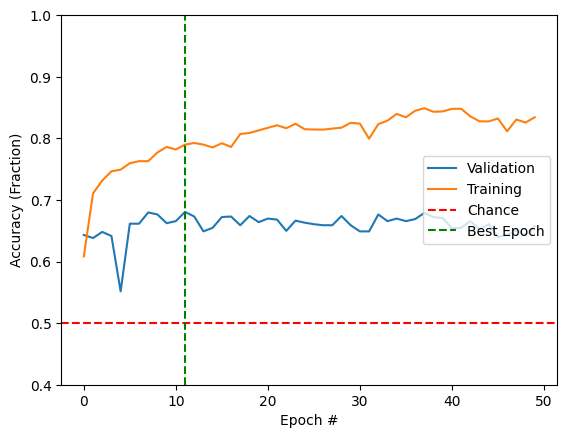

In [ ]:
# neural network

from tensorflow.keras.optimizers import Adam
optimizer = keras.optimizers.Adam(learning_rate=0.015)

model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50)
val_acc = np.max(history.history['val_accuracy'])

plot_acc(history)